### Exercise 1

In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tokenize and lemmatize function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return set(lemmatized_tokens)

# Given pairs for comparison
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

# Tokenize and lemmatize the sentences in pair1
pair1_tokens_0 = preprocess_text(pair1[0])
pair1_tokens_1 = preprocess_text(pair1[1])

# Compute Jaccard similarity index
intersection = pair1_tokens_0.intersection(pair1_tokens_1)
union = pair1_tokens_0.union(pair1_tokens_1)

jaccard_similarity = len(intersection) / len(union)
print("Jaccard similarity index between pair1[0] and pair1[1]:", jaccard_similarity)


Jaccard similarity index between pair1[0] and pair1[1]: 0.14285714285714285


### Exercise 2

In [2]:
def levenshtein_distance(str1, str2):
    # Create a matrix to store the distances
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]

    # Initialize the matrix with the indices
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    # Fill in the matrix
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(matrix[i - 1][j] + 1,     # Deletion
                               matrix[i][j - 1] + 1,     # Insertion
                               matrix[i - 1][j - 1] + cost)  # Substitution

    # Return the final distance
    return matrix[len(str1)][len(str2)]

# Example usage
str1 = "I cannot believe what he said"
str2 = "I believe it is not what he said"
distance = levenshtein_distance(str1, str2)
print("Levenshtein distance:", distance)


Levenshtein distance: 15


### Exercise 3

In [9]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Read the text file
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text
tokens = word_tokenize(text)

# Train Word2Vec model
model = Word2Vec([tokens], min_count=1, vector_size=100)

# Compute most similar words to 'government'
similar_words_to_government = model.wv.most_similar('government')
print("Most similar words to 'government':", similar_words_to_government)

# Compute most similar words to 'curfew'
similar_words_to_curfew = model.wv.most_similar('curfew')
print("Most similar words to 'curfew':", similar_words_to_curfew)


Most similar words to 'government': [('latest', 0.281465619802475), ('see', 0.22208116948604584), ('case', 0.21339964866638184), ('isolation', 0.20912496745586395), ('the', 0.2069094032049179), ('quarantine', 0.19703805446624756), ('Sanchez', 0.1927499771118164), ('months', 0.1848929226398468), ('procedures', 0.18419647216796875), ('Together', 0.178879514336586)]
Most similar words to 'curfew': [('Pedro', 0.21329520642757416), ('subject', 0.21275979280471802), ('procedures', 0.2088465392589569), ('Scientific', 0.19176457822322845), ('fact', 0.18848006427288055), ('would', 0.18015556037425995), ('average', 0.17241635918617249), ('on', 0.16746622323989868), ('more', 0.16389472782611847), ('to', 0.16102442145347595)]


### Exercise 4

In [10]:
from textblob import TextBlob

# Load the text
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Create a TextBlob object
blob = TextBlob(text)

# Calculate sentiment polarity (-1 to 1, where -1 is negative, 0 is neutral, and 1 is positive)
sentiment_polarity = blob.sentiment.polarity
print("Sentiment polarity:", sentiment_polarity)

# Calculate subjectivity (0 to 1, where 0 is objective and 1 is subjective)
subjectivity = blob.sentiment.subjectivity
print("Subjectivity:", subjectivity)


Sentiment polarity: 0.04992382294707877
Subjectivity: 0.3476432095036746


### Exercise 5

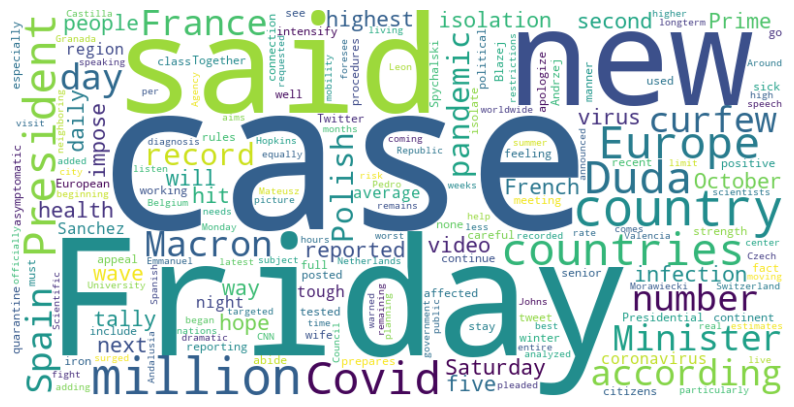

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the text
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Exercise 6

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import heapq

# Load the text
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Tokenize the text into words and remove stopwords
stop_words = set(stopwords.words("english"))
word_frequencies = defaultdict(int)
for word in word_tokenize(text):
    if word.lower() not in stop_words:
        word_frequencies[word.lower()] += 1

# Calculate weighted frequencies for sentences
sentence_scores = defaultdict(int)
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word_frequencies:
            sentence_scores[sentence] += word_frequencies[word]

# Get top 5 sentences with highest scores
summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)
print(summary)


The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October. "The next few weeks, months will be tough, very tough," Sanchez said, adding that while Spain has officially recorded more than 1 million cases, he estimates the real number is more than 3 million. "When I listen to the scientists, and the Scientific Council, we foresee [living with the virus] at best until next summer," Macron said, speaking during a visit to a health center. On the same day France reported 42,032 new cases in 24 hours, a new record, according to the French Health Agency. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday.


### Exercise 7

In [19]:
from transformers import pipeline

# Read the text from the file
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Define the categories
categories = ["informational", "query", "advocacy", "not informational"]

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# Classify the text into the categories
result = classifier(text, categories)

# Print the classification result
print("Text:", text)
print("Categories:")
for label, score in zip(result["labels"], result["scores"]):
    print(f"{label}: {score}")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Text: European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's 

In [ ]:
|